      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
5  6.430    28.7
6  6.012    22.9
7  6.172    27.1
8  5.631    16.5
9  6.004    18.9 

               RM      target
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


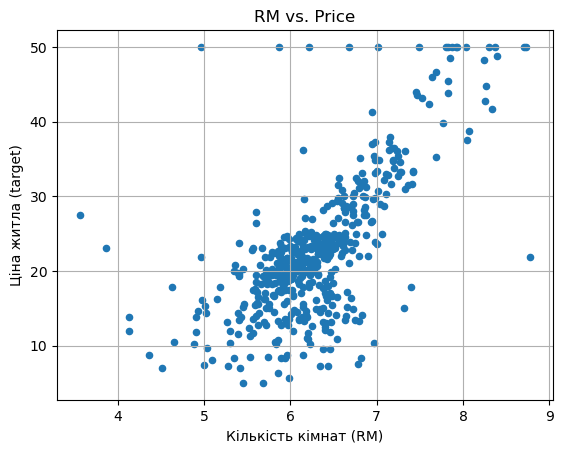

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Завантаження датасету Boston Housing
np.random.seed(2018)
boston = fetch_openml(name='boston', version=1, as_frame=True)

# Формування датафрейму з колонкою RM (середня кількість кімнат) і цільовою змінною
df = boston.frame[['RM', 'MEDV']].copy()  # створюємо копію, щоб уникнути warning
df.rename(columns={'MEDV': 'target'}, inplace=True)

# Вивід перших 10 рядків та статистики
print(df.head(10), '\n')
print(df.describe())

# Побудова діаграми розсіювання
df.plot.scatter(x='RM', y='target', title='RM vs. Price')
plt.xlabel('Кількість кімнат (RM)')
plt.ylabel('Ціна житла (target)')
plt.grid(True)
plt.show()

X = df[['RM']].to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [7]:
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
print(X_train[:10])

X_train.shape=  (379, 1)
y_train.shape=  (379,)
[[7.155]
 [6.152]
 [7.82 ]
 [5.613]
 [6.333]
 [6.072]
 [6.092]
 [5.186]
 [6.425]
 [6.059]]


In [13]:
import numpy as np

class Linear_Regression_1():
    def __init__(self):
        pass
            
    def h(self, b, w, X): 
        assert X.shape[1] == w.shape[1], 
        h_res = X @ w.T + b 
        return h_res

np.random.seed(2018)
b_check = np.random.randn()
w_check = np.random.randn(1, 1)
X_check = np.random.randn(10, 1)

print('b = {}\nw = {}\nX = \n{}'.format(b_check, w_check, X_check))

lin_reg_1 = Linear_Regression_1()
y_pred = lin_reg_1.h(b_check, w_check, X_check)

print("\nПрогнози h(X):")
print(y_pred)




b = -0.276767596147759
w = [[0.581851]]
X = 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]

Прогнози h(X):
[[ 0.97328067]
 [-1.02123839]
 [ 0.01548272]
 [ 0.22131391]
 [-0.35985014]
 [-0.21271821]
 [-0.67711878]
 [-0.0244979 ]
 [ 0.02010501]
 [-0.37284922]]


In [15]:
import numpy as np

class Linear_Regression_3():
    def __init__(self, max_iter=1e5, alpha=1, eps=1e-10, verbose=0):
        self.max_iter = int(max_iter)
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose        

    def h(self, b, w, X): 
        '''
        :param b: float або ndarray [m,1]
        :param w: ndarray [1,n]
        :param X: ndarray [m,n]
        :return: ndarray [m,1]
        '''
        assert X.shape[1] == w.shape[1]
        h_res = X @ w.T + b  # матричне множення
        return h_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params: кортеж (b, w), де w має форму (1, n)
        :param X: ndarray (m, n)
        :param y: ndarray (m, 1)
        :return: кортеж похідних (dJ_b, dJ_w)
        '''
        b, w = params
        self.m, self.n = X.shape
        assert w.shape == (1, self.n)

        h_val = self.h(b, w, X)

        if h_val.shape != (self.m, 1):
            print(f'h.shape = {h_val.shape}, але очікується {(self.m, 1)}')
            raise Exception('Перевір форму h у J_derivative')

        dJ_b = np.sum(h_val - y) / self.m
        dJ_w = np.sum((h_val - y) * X, axis=0, keepdims=True) / self.m
        return (dJ_b, dJ_w)

# DON'T_CHANGE_THIS_CODE
np.random.seed(2020)
m = 10
n = 1
X_check = np.random.randn(m, n)
y_check = np.random.randn(m, 1)
b_check = np.random.randn()
w_check = np.random.randn(1, n)
params = (b_check, w_check)

print('X =\n', X_check)
print('y =\n', y_check)
print('b =', b_check)
print('w =', w_check)

lin_reg_3 = Linear_Regression_3()
grads = lin_reg_3.J_derivative(params, X_check, y_check)

print("\nГрадієнти:")
print("dJ/db =", grads[0])
print("dJ/dw =", grads[1])


X =
 [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]]
y =
 [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]]
b = 2.0899788404287745
w = [[0.04197131]]

Градієнти:
dJ/db = 2.190460881995871
dJ/dw = [[-1.43284262]]


In [17]:
import numpy as np

class Linear_Regression_4():
    '''
    Linear regression using gradient descent
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        self.max_iter = int(max_iter)
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       

    def h(self, b, w, X): 
        assert X.shape[1] == w.shape[1]
        h_res = X @ w.T + b  # матричне множення
        if h_res.shape != (X.shape[0], 1):
            raise Exception(f"h.shape = {h_res.shape} but expected {(X.shape[0], 1)}")
        return h_res

    def J(self, h, y):      
        if h.shape != y.shape:
            raise Exception(f"h.shape = {h.shape} does not match y.shape = {y.shape}")
        m = h.shape[0]
        err = h - y
        return (1 / (2 * m)) * np.sum(err ** 2)

    def J_derivative(self, params, X, y): 
        b, w = params
        assert w.shape == (1, self.n)
        h_val = self.h(b, w, X)
        if h_val.shape != (self.m, 1):
            raise Exception(f"h.shape = {h_val.shape}, but expected {(self.m, 1)}")

        dJ_b = np.sum(h_val - y) / self.m
        dJ_w = np.sum((h_val - y) * X, axis=0, keepdims=True) / self.m
        return dJ_b, dJ_w

    def fit(self, X, y):
        self.m, self.n = X.shape
        y = y.reshape(self.m, 1)
        b = 0
        w = np.zeros((1, self.n))
        params = (b, w)

        self.J_hist = []
        iter_number = 0

        while True:
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b -= self.alpha * dJ_b
            w -= self.alpha * dJ_w
            params = (b, w)

            cost = self.J(self.h(b, w, X), y)
            self.J_hist.append(cost)
            if self.verbose:
                print(f"iter {iter_number}: b = {b:.5f}, w = {w}, J = {cost:.5f}")

            if iter_number >= self.max_iter:
                break
            if iter_number > 0 and abs(self.J_hist[-2] - self.J_hist[-1]) < self.eps:
                break

            iter_number += 1

        self.intercept_, self.coef_ = params
        return True


In [19]:
np.random.seed(2021)
m = 10
n = 1
X_check = np.random.randn(m, n)
y_check = np.random.randn(m, 1)

print('X =\n', X_check)
print('y =\n', y_check)

lin_reg_4 = Linear_Regression_4(alpha=1, max_iter=5, verbose=1)
lin_reg_4.fit(X_check, y_check)

print("\nФінальні параметри:")
print("intercept_ =", lin_reg_4.intercept_)
print("coef_ =", lin_reg_4.coef_)


X =
 [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]]
y =
 [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
iter 0: b = -0.36694, w = [[-0.4217246]], J = 0.33977
iter 1: b = -0.23644, w = [[-0.46886908]], J = 0.32781
iter 2: b = -0.22185, w = [[-0.52721539]], J = 0.32509
iter 3: b = -0.20379, w = [[-0.55396166]], J = 0.32428
iter 4: b = -0.19552, w = [[-0.5697399]], J = 0.32404
iter 5: b = -0.19063, w = [[-0.57831305]], J = 0.32396

Фінальні параметри:
intercept_ = -0.19063380881762437
coef_ = [[-0.57831305]]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

class Linear_Regression():
    '''
    Linear regression using gradient descent
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        self.max_iter = int(max_iter)
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       

    def h(self, b, w, X):
        assert X.shape[1] == w.shape[1], "Shapes of X and w don't match"
        h_res = X @ w.T + b  # правильне матричне множення
        if h_res.shape != (X.shape[0], 1):
            raise ValueError(f'h.shape = {h_res.shape} but expected {(X.shape[0],1)}')    
        return h_res

    def J(self, h, y):      
        if h.shape != y.shape:
            raise ValueError(f'h.shape = {h.shape} does not match y.shape = {y.shape}. Expected {(self.m,1)}')   
        m = h.shape[0]
        return (1 / (2 * m)) * np.sum((h - y) ** 2)

    def J_derivative(self, params, X, y): 
        b, w = params
        h_val = self.h(b, w, X)
        dJ_b = np.sum(h_val - y) / self.m
        dJ_w = ((h_val - y).T @ X) / self.m  # форма (1, n)
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        self.m, self.n = X.shape  
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        b = 0  
        w = np.zeros((1, self.n))
        params = (b, w)

        self.J_hist = [-1]  
        for i in range(self.max_iter):
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b -= self.alpha * dJ_b
            w -= self.alpha * dJ_w
            params = (b, w)

            current_J = self.J(self.h(b, w, X), y)
            self.J_hist.append(current_J)

            if self.verbose:
                print(f'Iter {i:4d}: b = {b:.5f}, w = {w}, J = {current_J:.5f}')

            if np.abs(self.J_hist[-2] - self.J_hist[-1]) < self.eps:
                if self.verbose:
                    print("Converged.")
                break

        self.intercept_, self.coef_ = params        
        return True        

    def draw_cost_changes(self):        
        J_hist = self.J_hist[1:]  # пропускаємо -1
        plt.figure(figsize=(8,5))
        plt.plot(J_hist, marker='o', markersize=3)
        plt.xlabel('Iteration')
        plt.ylabel('Cost J')
        plt.title(f'Gradient Descent Progress: {len(J_hist)} iters, alpha={self.alpha}, eps={self.eps}')
        plt.grid(True)
        plt.show()

    def predict(self, X): 
        return self.h(self.intercept_, self.coef_, X)

    def score(self, X_test, y_test):
        if y_test.ndim == 2 and y_test.shape[1] == 1:
            y_test = y_test.ravel()
        y_pred = self.predict(X_test).ravel()
        return r2_score(y_test, y_pred)


Iter    0: b = 0.22908, w = [[1.4966982]], J = 125.02956
Iter    1: b = 0.36122, w = [[2.37269157]], J = 62.82820
Iter    2: b = 0.43665, w = [[2.88551854]], J = 41.53360
Iter    3: b = 0.47890, w = [[3.18586151]], J = 34.24250
Iter    4: b = 0.50173, w = [[3.36188281]], J = 31.74517
Iter    5: b = 0.51321, w = [[3.46516506]], J = 30.88887
Iter    6: b = 0.51803, w = [[3.52588861]], J = 30.59435
Iter    7: b = 0.51897, w = [[3.56171157]], J = 30.49213
Iter    8: b = 0.51764, w = [[3.58296548]], J = 30.45575
Iter    9: b = 0.51497, w = [[3.5956952]], J = 30.44191
Iter   10: b = 0.51153, w = [[3.60343748]], J = 30.43578
Iter   11: b = 0.50763, w = [[3.60826164]], J = 30.43229
Iter   12: b = 0.50346, w = [[3.61137841]], J = 30.42971
Iter   13: b = 0.49914, w = [[3.61349617]], J = 30.42743
Iter   14: b = 0.49473, w = [[3.61502938]], J = 30.42527
Iter   15: b = 0.49027, w = [[3.61622056]], J = 30.42314
Iter   16: b = 0.48577, w = [[3.61721156]], J = 30.42102
Iter   17: b = 0.48126, w = [[3.

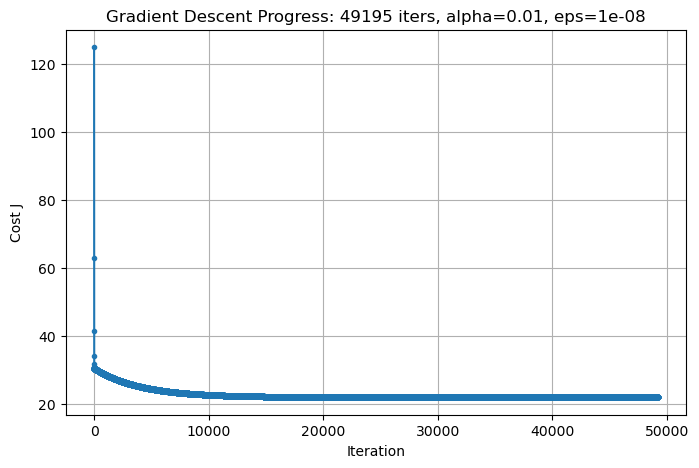

R² Score = 0.3896645360788197
b: -35.847722982348444
w: [[9.2917946]]


In [23]:
lin_reg = Linear_Regression(alpha=0.01, verbose=1, eps=1e-8)
lin_reg.fit(X_train, y_train)
lin_reg.draw_cost_changes()
print("R² Score =", lin_reg.score(X_test, y_test))
print("b:", lin_reg.intercept_)
print("w:", lin_reg.coef_)


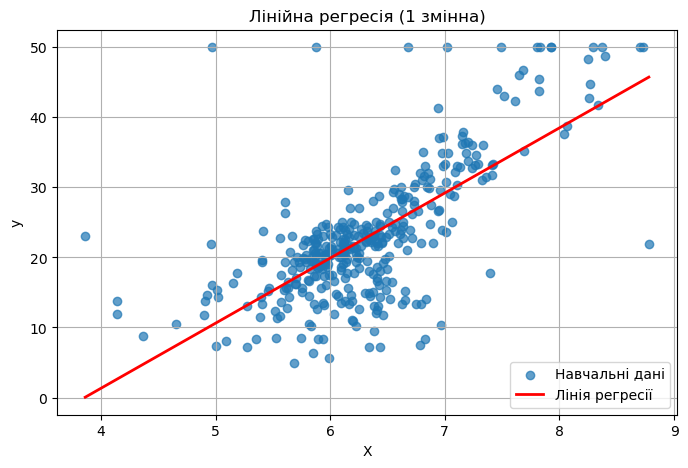

In [29]:
import matplotlib.pyplot as plt
import numpy as np

if X_train.shape[1] != 1:
    raise Exception('Для побудови графіку виберіть лише одну ознаку (1 стовпець у X_train)')
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Навчальні дані', alpha=0.7)

# Лінія регресії
x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = lin_reg.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Лінія регресії')

plt.title('Лінійна регресія (1 змінна)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


R² score на тестових даних: 0.3895
Інтерсепт (b): 22.9070
Коефіцієнти (w): [[6.69068238]]


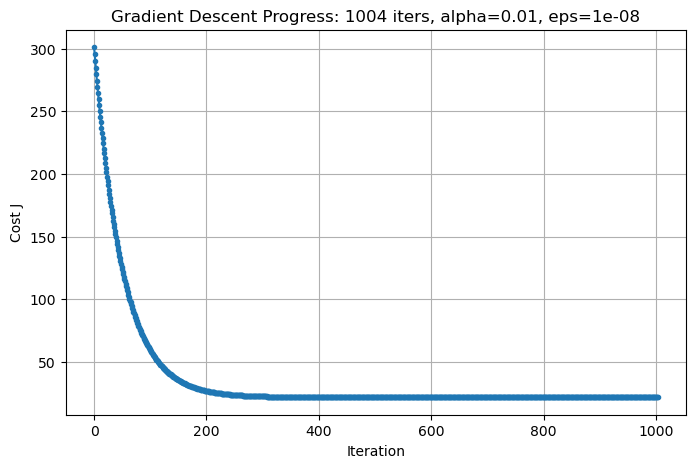

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = Linear_Regression(alpha=0.01, verbose=0, eps=1e-8)
lin_reg.fit(X_train_scaled, y_train)

r2 = lin_reg.score(X_test_scaled, y_test)
print(f'R² score на тестових даних: {r2:.4f}')
print(f'Інтерсепт (b): {lin_reg.intercept_:.4f}')
print(f'Коефіцієнти (w): {lin_reg.coef_}')

lin_reg.draw_cost_changes()


R² = 0.7715914610629321
b = 22.199472295514372
w = [[-0.67995964  1.10938975  0.03571462  0.82219733 -2.23001733  2.42776353
   0.2606841  -3.28896418  2.54449023 -2.09473983 -1.95526668  0.76743339
  -4.20882797]]


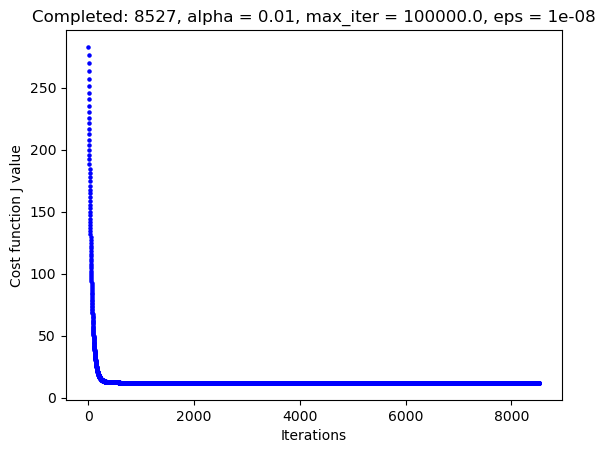

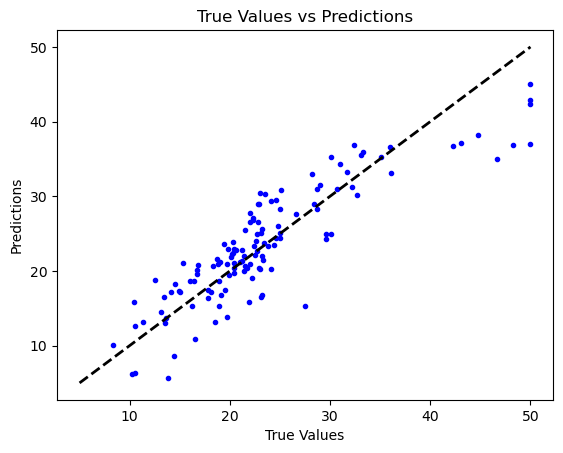

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

class Linear_Regression_Multi():
    '''
    Linear regression using gradient descent.
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        '''
        :param verbose: set 1 to display more details of J value changes.
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       

    def h(self, b, w, X):
        '''
        :param b - float or ndarray of shape [m,1], m - number of samples.
        :param w - ndarray of shape [1,n], n - number of features.
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features.
        '''
        assert (X.shape[1] == w.shape[1])

        h_res = X @ w.T + b 
        
        if h_res.shape != (X.shape[0], 1):
            print(f'h.shape = {h_res.shape} but expected {(self.m, 1)}')
            raise Exception('Check assertion in h')    
        return h_res

    def J(self, h, y):      
        '''
        :param h - ndarray of shape (m,1).
        :param y - ndarray of shape (m,1).
        :return expression for cost function.
        '''
        if h.shape != y.shape:
            print(f'h.shape = {h.shape} does not match y.shape = {y.shape}. Expected {(self.m, 1)}')
            raise Exception('Check assertion in J')   
        
        m = h.shape[0]
        err = h - y
        J_res = (1 / (2 * m)) * np.sum(err**2)
        
        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarray of shape (1,n), n - number of features.
        :param X - ndarray of shape (m, n).
        :param y - ndarray of shape (m,1).
        :return tuple of derivatives of cost function by b and w.
        '''
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        if h_val.shape != (self.m, 1):
            print(f'h.shape = {h_val.shape}, but expected {(self.m, 1)}')
            raise Exception('Check assertion in J_derivative')
        
        dJ_b = np.sum(h_val - y) / self.m
        dJ_w = ((h_val - y).T @ X) / self.m
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features.
        :param y - ndarray - 1d array.
        :return: True in case of successful fit.
        '''      
        if self.verbose: 
            print(f'Running gradient descent with alpha = {self.alpha}, eps = {self.eps}, max_iter = {self.max_iter}')
        
        self.m, self.n = X.shape  # Number of samples, number of features  
        y = y.reshape(self.m, 1)  # Make it 2D to ensure it corresponds to h_val
        b = 0  # Initialize intercept with 0
        w = np.zeros(self.n).reshape(1, -1)  # Ensure its shape is [1, n]
        params = (b, w)
        
        self.J_hist = [-1]  # Used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True  # Flag to continue next iteration (gradient descent step)
        iter_number = 0  # Used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)
            
            # Keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print(f'b = {b}, w= {w}, J = {self.J_hist[-1]}')
            
            # Check criteria to exit the loop (finish gradient descent)
            if self.max_iter and iter_number > self.max_iter:  # If max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number - 1] - self.J_hist[iter_number]) < self.eps:  # If accuracy is achieved
                continue_iter = False
            iter_number += 1
            
        self.intercept_, self.coef_ = params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist = self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0, len(J_hist)), J_hist, s=20, marker='.', c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = f'Completed: {len(self.J_hist) - 2}, alpha = {self.alpha}, max_iter = {self.max_iter}, eps = {self.eps}'
        plt.title(title_str)

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?, n).
        :return predictions for X.
        '''
        return self.h(self.intercept_, self.coef_, X)
        
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?, n], ? - number of samples, n - number of features.
        :param y_test - ndarray - 1d array.
        :return R2 score of y_test and prediction for X_test.
        '''
        z = self.predict(X_test)
        return r2_score(y_test, z)

# Load data
np.random.seed(2021)
boston = fetch_openml(name='boston', version=1, as_frame=True)
X, y = boston.data, boston.target
y = y.to_numpy()
X = X.to_numpy()

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
lin_reg_multi = Linear_Regression_Multi(alpha=0.01, eps=1e-8, verbose=0)
lin_reg_multi.fit(X_train_scaled, y_train)

# Print R² and parameters
print('R² =', lin_reg_multi.score(X_test_scaled, y_test))
print('b =', lin_reg_multi.intercept_)
print('w =', lin_reg_multi.coef_)

# Plot cost function changes during gradient descent
lin_reg_multi.draw_cost_changes()

# Predict and plot predictions vs actual values
y_pred = lin_reg_multi.predict(X_test_scaled)
plt.figure()
plt.scatter(y_test, y_pred, c='blue', marker='.')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


In [37]:
# Ініціалізація та тренування моделі з вашою реалізацією
lin_reg_multi = Linear_Regression_Multi(alpha=0.01, eps=1e-8, verbose=0)
lin_reg_multi.fit(X_train_scaled, y_train)

# Оцінка моделі на тестових даних
r2_score_multi = lin_reg_multi.score(X_test_scaled, y_test)
print('R² (Ваше реалізоване Liniar Regression):', r2_score_multi)

# Якщо хочете порівняти з результатами sklearn
from sklearn.linear_model import LinearRegression
lin_reg_sklearn = LinearRegression().fit(X_train_scaled, y_train)
r2_score_sklearn = lin_reg_sklearn.score(X_test_scaled, y_test)
print('R² (sklearn Linear Regression):', r2_score_sklearn)


R² (Ваше реалізоване Liniar Regression): 0.7715914610629321
R² (sklearn Linear Regression): 0.7716066981275936
